Importing Python Libraries and data set

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, RidgeCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
# Importing data set into a Dataframe
df = pd.read_csv('winequality-red.csv')
 
# Creating a copy of the data frame
df_1 = df.copy(deep=True)

Exploratory Data Analysis (EDA)

In [4]:
df.info()
# The dependent variable will be quality, I can see it is an int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe().round(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000
mean,8.3196,0.5278,0.2710,2.5388,0.0875,15.8749,46.4678,0.9967,3.3111,0.6581,10.4230,5.6360
std,1.7411,0.1791,0.1948,1.4099,0.0471,10.4602,32.8953,0.0019,0.1544,0.1695,1.0657,0.8076
min,4.6000,0.1200,0.0000,0.9000,0.0120,1.0000,6.0000,0.9901,2.7400,0.3300,8.4000,3.0000
25%,7.1000,0.3900,0.0900,1.9000,0.0700,7.0000,22.0000,0.9956,3.2100,0.5500,9.5000,5.0000
50%,7.9000,0.5200,0.2600,2.2000,0.0790,14.0000,38.0000,0.9968,3.3100,0.6200,10.2000,6.0000
75%,9.2000,0.6400,0.4200,2.6000,0.0900,21.0000,62.0000,0.9978,3.4000,0.7300,11.1000,6.0000
max,15.9000,1.5800,1.0000,15.5000,0.6110,72.0000,289.0000,1.0037,4.0100,2.0000,14.9000,8.0000


In [6]:
# Check if there are null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Investigating the dependable variable:
# The quality is rankend in 6 categories

cardinality_quality = df['quality'].nunique()
cardinality_quality

6

Text(0, 0.5, 'Wine count')

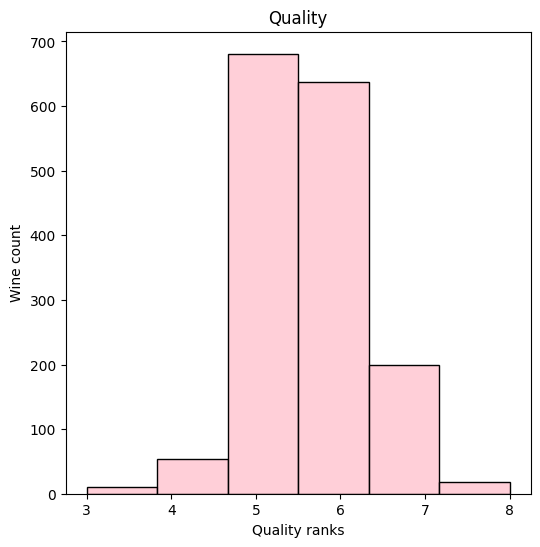

In [9]:
# Histogram of dependent variable
fig, ax = plt.subplots(figsize=(6,6))

sns.histplot(df_1, x='quality', stat='count', color = 'pink', bins =6)

plt.title('Quality')
plt.xlabel('Quality ranks')
plt.ylabel('Wine count')

In [11]:
# We can see the average quality is around 5 and 6, so we can decide that a good wines are the ones rated 7 and 8.
# We can now tranform the quality in a binary values, based on this observation and using 7 as treshold.

# TRANSFORM DEPENDENT VARIABLE IN BINARY FEATURE
df['quality'] = np.where(df['quality'] >6, 1, 0)

Text(0, 0.5, 'Wine count')

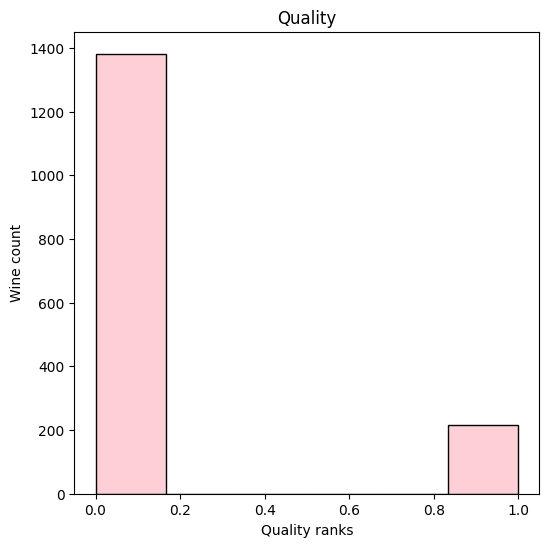

In [12]:
# Histogran of the dependent variable after binary transformation
# Histogram of dependent variable
fig, ax = plt.subplots(figsize=(6,6))

sns.histplot(df, x='quality', stat='count', color = 'pink', bins =6)

plt.title('Quality')
plt.xlabel('Quality ranks')
plt.ylabel('Wine count')

In [20]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1414,10.0,0.32,0.59,2.2,0.077,3.0,15.0,0.99940,3.20,0.78,9.6,0
347,13.8,0.49,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,0
683,8.1,0.78,0.23,2.6,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,0
540,9.2,0.59,0.24,3.3,0.101,20.0,47.0,0.99880,3.26,0.67,9.6,0
212,11.6,0.44,0.64,2.1,0.059,5.0,15.0,0.99800,3.21,0.67,10.2,0
945,10.2,0.44,0.42,2.0,0.071,7.0,20.0,0.99566,3.14,0.79,11.1,1
1560,7.8,0.60,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,0
650,10.7,0.43,0.39,2.2,0.106,8.0,32.0,0.99860,2.89,0.50,9.6,0
1580,7.4,0.35,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,0
342,10.9,0.39,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,0


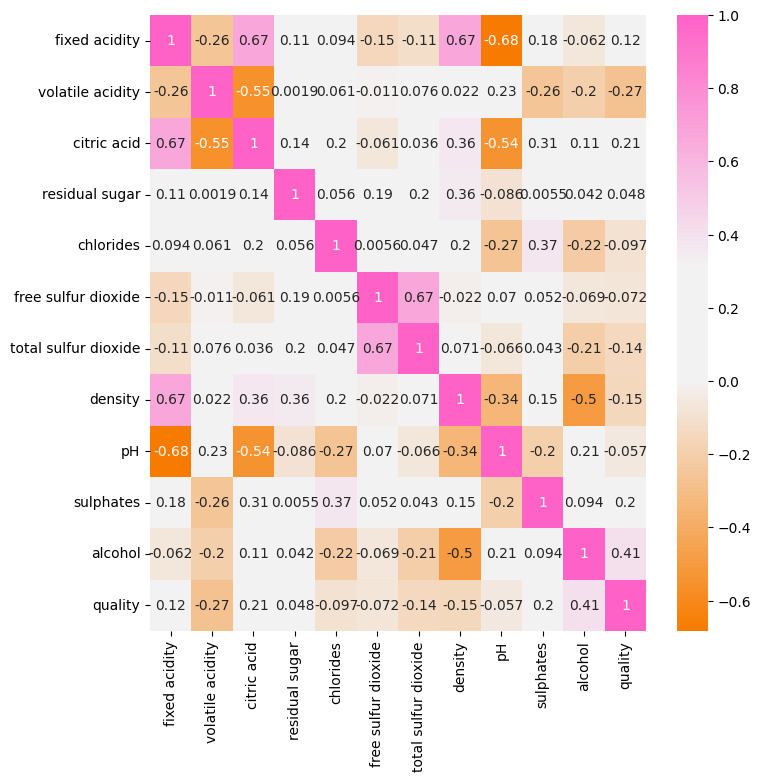

In [13]:
# Correlation analysis
dependable= 'quality'
cmap = sns.diverging_palette(30, 333, s=100, l=65, sep=50, center="light", as_cmap=True)
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(pd.concat([df.drop(dependable,axis=1), df[dependable]],axis=1).corr(), annot=True, cmap=cmap)

In [14]:
# Defyning the X and y
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(1599, 11)
(1599,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [26]:
# Split the data
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 1/4, random_state=1)

In [27]:
# Normalisation of the data
# Standard scaler
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [28]:
# Fitting the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Making a prediction
y_pred = log_reg.predict(X_test)

In [30]:
# Get results in a data frame
result_log = {'Actual wine quality': y_test, 'Predicted wine quality': y_pred}
output= pd.DataFrame(result_log)
output


,Actual wine quality,Predicted wine quality
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
395,0,0
396,0,0
397,1,0
398,0,0


In [31]:
# Calculate accuracy
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.885


In [34]:
# Compute confusion matrix to evaluate the accuracy of a classification.
conf_mat =confusion_matrix(y_test, y_pred)
conf_mat

# C(0,0) = count of true negative
# C(1,0) = count of false negative
# C(1,1) = count of true positive
# C(0,1) = count of false positive

array([[340,  15],
       [ 31,  14]], dtype=int64)

In [33]:
accuracy = (conf_mat[0][0] +conf_mat[1][1]) / (conf_mat[0][0] +conf_mat[1][1]+conf_mat[0][1] +conf_mat[1][0])
accuracy

0.885